In [2]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from argparse import Namespace
# from model import MLP
from model3 import MLP
from torch import nn
from dataloader import load_data
from tqdm import tqdm


train_inputs,train_lables,test_inputs,test_lables=load_data(60000,60000,device=torch.device('cuda:0'))




load data set
create loader
construct data


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


epoch0 loss:2.7501909732818604
epoch0 acc:0.0841
epoch1 loss:2.605262279510498
epoch1 acc:0.0854
epoch2 loss:2.522700071334839
epoch2 acc:0.0874
epoch3 loss:2.4686954021453857
epoch3 acc:0.0919
epoch4 loss:2.4295530319213867
epoch4 acc:0.0986
epoch5 loss:2.3991739749908447
epoch5 acc:0.1085
epoch6 loss:2.37426495552063
epoch6 acc:0.1175
epoch7 loss:2.3529841899871826
epoch7 acc:0.1278
epoch8 loss:2.334294319152832
epoch8 acc:0.1408
epoch9 loss:2.317429780960083
epoch9 acc:0.1505
epoch10 loss:2.301949977874756
epoch10 acc:0.1602
epoch11 loss:2.2875726222991943
epoch11 acc:0.1691
epoch12 loss:2.2741146087646484
epoch12 acc:0.1802
epoch13 loss:2.261382579803467
epoch13 acc:0.191
epoch14 loss:2.2491965293884277
epoch14 acc:0.2013
epoch15 loss:2.2374463081359863
epoch15 acc:0.2123
epoch16 loss:2.2260372638702393
epoch16 acc:0.2218
epoch17 loss:2.21492600440979
epoch17 acc:0.2314
epoch18 loss:2.2040390968322754
epoch18 acc:0.2427
epoch19 loss:2.193358898162842
epoch19 acc:0.2527
epoch20 loss

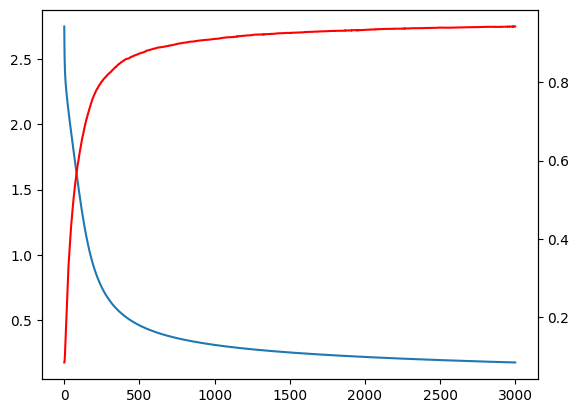

In [4]:
from matplotlib import pyplot as plt
param=Namespace(
    lr            = 1e-3,
    epoch         = 3000,  
)

def acc(model):
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
        
        for i in range(len(test_inputs)):
            outputs=model(test_inputs[i])
            _,predicted=torch.max(outputs.data,1)
            total+=len(predicted)
            correct+=(predicted==test_lables[i]).sum().item()
    model.train()
    return correct/total

mlp = MLP()
mlp.train()

device = torch.device('cuda:0')
mlp.to(device,non_blocking=True)
optimizer = torch.optim.SGD(mlp.parameters(), lr=param.lr)
loss_function = nn.CrossEntropyLoss()

loss_list=[]
acc_list=[]

for epoch in range(param.epoch):
    ls=0
    for i in range(len(train_inputs)): 
        inputi  = train_inputs[i]
        label  = train_lables[i]
        output = mlp(inputi)
        loss   = loss_function(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ls+=loss
        
    print(f"epoch{epoch} loss:{loss}")
    
    acci=acc(mlp)
    print(f"epoch{epoch} acc:{acci}")
    acc_list.append(acci)
    loss_list.append(ls)


y1=plt.subplot()
loss_list=[i.cpu().detach().numpy() for i in loss_list]

y1.plot(range(param.epoch),loss_list,label='loss')

y2=y1.twinx()
y2.plot(range(param.epoch),acc_list,label='acc',color='r')

plt.show()
torch.save(mlp,'./mlp3.pth')